# Visualisation en donut des responsabilités de l'archiviste au sein de projet numérique

Ce notebook contient le code utilisé pour générer la visualisation sous forme de donut de la place de l'archiviste au sein de projet numérique dans les institutions cantonales d'archives. Toutes les versions du code sont conservées dans ce notebook. La visualisation est disponible contextualisé dans le rapport de l'étude.

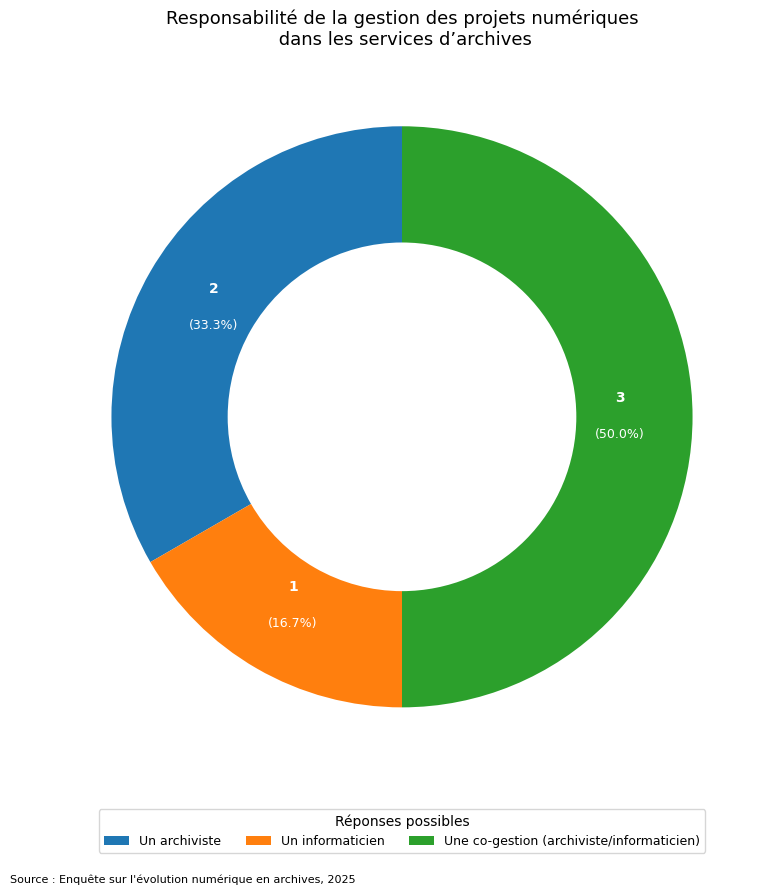

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import numpy as np

# Charger les données
file_path = "Gestion_projet_archives.xlsx"  # Adapte le chemin si nécessaire
df = pd.read_excel(file_path, sheet_name="Feuil1")

# Nom de la colonne cible
col = "Dans votre service d’archives, la gestion des projets numériques est de la responsabilité de quel profil professionnel ?"
df[col] = df[col].str.strip()  # Nettoyage des espaces

# Ordre des modalités attendues
ordre = [
    "Un archiviste",
    "Un informaticien",
    "Une co-gestion (archiviste/informaticien)"
    
]

# Comptage des réponses
counts = df[col].value_counts().reindex(ordre, fill_value=0)
counts_present = counts[counts > 0]

# Palette de couleurs variées
palette_diverse = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
colors_present = [color for c, color in zip(counts, palette_diverse) if c > 0]

# Tracer le donut
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _ = ax.pie(
    counts_present,
    labels=None,
    colors=colors_present,
    startangle=90,
    wedgeprops=dict(width=0.4)
)

# Ajouter les étiquettes (valeurs + pourcentages)
total = counts.sum()
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    radius = 0.75
    x = np.cos(np.deg2rad(angle)) * radius
    y = np.sin(np.deg2rad(angle)) * radius
    valeur = counts_present.iloc[i]
    pct = valeur / total * 100

    ax.text(x, y + 0.04, f"{valeur}", ha='center', va='bottom', color='white', fontsize=10, weight='bold')
    ax.text(x, y - 0.04, f"({pct:.1f}%)", ha='center', va='top', color='white', fontsize=9)

# Légende sous le donut
fig.legend(
    handles=[Patch(facecolor=color, label=label) for color, label in zip(palette_diverse, ordre)],
    title="Réponses possibles",
    loc="lower center",
    ncol=3,
    fontsize=9,
    bbox_to_anchor=(0.5, -0.08)
)

# Titre et source bien séparée
ax.set_title("Responsabilité de la gestion des projets numériques\n dans les services d’archives", fontsize=13)
plt.figtext(0.01, -0.11, "Source : Enquête sur l'évolution numérique en archives, 2025", ha="left", fontsize=8)

plt.tight_layout()
plt.show()
